In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [319]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [332]:
datacols = ['ram', 'storage','screen','final_price']
data = df[datacols]

data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [333]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

median for RAM


In [334]:
data.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [335]:
data.isna().any()

ram            False
storage        False
screen          True
final_price    False
dtype: bool

Determine does final_price have a long tail


<Axes: xlabel='final_price', ylabel='Count'>

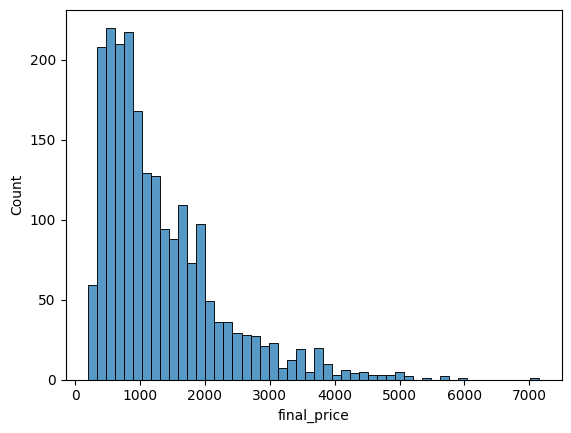

In [337]:
sns.histplot(data.final_price, bins=50)

prepare n split

In [338]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [339]:
n , n_val + n_test + n_train

(2160, 2160)

In [340]:
n_val, n_test, n_train

(432, 432, 1296)

In [341]:
data_train = data.iloc[:n_train]
data_val = data.iloc[n_train:n_train+n_val]
data_test = data.iloc[n_train+n_val:]

In [343]:
len(data_train), len(data_val), len(data_test)

(1296, 432, 432)

In [401]:
idx = np.arange(n)

In [402]:
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [403]:
data.iloc[idx[:10]]

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
5,32,1000,17.3,1699.00
6,8,256,14.0,909.00
7,8,512,15.6,809.01
8,8,256,15.6,519.00
9,16,512,16.1,1149.00


In [397]:
np.random.seed(42)
np.random.shuffle(idx)

In [398]:
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

In [400]:
idx

array([1159,  100,  656, ..., 1346, 1150,  274])

In [350]:
len(data_train), len(data_test), len(data_val)

(1296, 432, 432)

In [351]:
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [352]:
y_train = np.log1p(data_train.final_price.values)
y_val = np.log1p(data_val.final_price.values)
y_test = np.log1p(data_test.final_price.values)

In [353]:
del data_train['final_price']
del data_val['final_price']
del data_test['final_price']

In [354]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [355]:
base = ['ram', 'storage', 'screen']

In [356]:
X_train = data_train[base].fillna(0).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [366]:
def prepare_X_fillna_0(data):
    data = data.copy()
    
    data_num = data
    data_num = data_num.fillna(0)
    X = data_num.values
    return X

In [394]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [368]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(6.7271637061124565),
 array([ 0.02630589,  0.00066041, -0.03651909]))

In [369]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

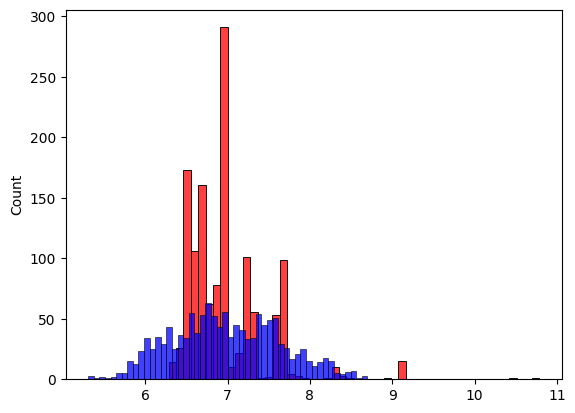

In [370]:
sns.histplot(y_pred, color='red',bins=50)
sns.histplot(y_train, color='blue', bins=50)

In [371]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

rmse fill with 0

In [372]:
rmse(y_train, y_pred)

np.float64(0.45)

In [393]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [405]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    X_train = prepare_X_fillna_0(data_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)

    X_val = prepare_X_fillna_0(data_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 6.722879421950617 0.41
0.01 6.722879421950617 0.41
0.1 6.722879421950617 0.41
1 6.722879421950617 0.41
5 6.722879421950617 0.41
10 6.722879421950617 0.41
100 6.722879421950617 0.41


seed checks


In [404]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]
    
    data_train = df_shuffled.iloc[:n_train].copy()
    data_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    data_test = df_shuffled.iloc[n_train+n_val:].copy()

    data_train = data_train.reset_index(drop=True)
    data_val = data_val.reset_index(drop=True)
    data_test = data_test.reset_index(drop=True)

    # y_train = np.log1p(data_train.final_price.values)
    
    y_train_orig = data_train.final_price.values
    y_val_orig = data_val.final_price.values
    y_test_orig = data_test.final_price.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del data_train['final_price']
    del data_val['final_price']
    del data_test['final_price']
    
    X_null_train = prepare_X_fillna_0(data_train)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X_fillna_0(data_val)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 6.572550232271579 0.43
1 6.750720484984187 0.45
2 6.632127478045767 0.45
3 6.651036507373452 0.45
4 6.685700424342468 0.42
5 6.655019237483877 0.43
6 6.896746475861467 0.45
7 6.554102037367292 0.43
8 6.608907527823908 0.44
9 6.722879421950617 0.41


In [392]:
rmse_list

[np.float64(0.43),
 np.float64(0.45),
 np.float64(0.45),
 np.float64(0.45),
 np.float64(0.42),
 np.float64(0.43),
 np.float64(0.45),
 np.float64(0.43),
 np.float64(0.44),
 np.float64(0.41)]

In [383]:
np.round(np.std(rmse_list),3)

np.float64(0.014)

Seed and Regularization

In [409]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
    
data_train = df_shuffled.iloc[:n_train].copy()
data_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [data_train, data_val]
data_train_val = pd.concat(frames)

data_train_val = data_train_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

y_train_val_orig = data_train_val.final_price.values
y_test_orig = data_test.final_price.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del data_train_val['final_price']
del data_test['final_price']

In [410]:
X_null_train_val = prepare_X_fillna_0(data_train_val)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X_fillna_0(data_test)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

np.float64(0.46)

NameError: name 'prepare_X' is not defined

rmse fill mean

In [270]:
data.isnull().sum()
# data = data['screen'].fillna(df['screen'].mean())

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [271]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [272]:
X_train = data_train.fillna(df['screen'].mean()).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [273]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(6.855538042890544), array([ 0.02650249,  0.00066642, -0.04534136]))

In [274]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

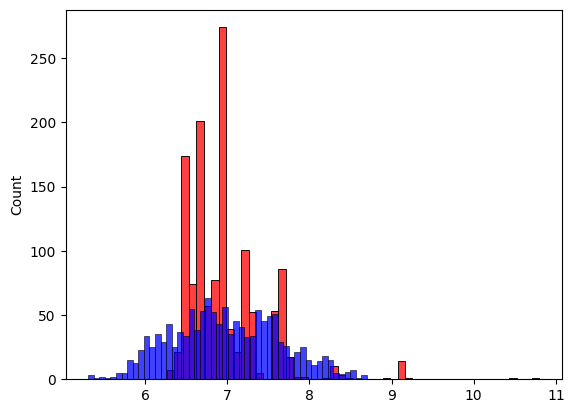

In [275]:
sns.histplot(y_pred, color='red',bins=50)
sns.histplot(y_train, color='blue', bins=50)

In [279]:
rmse(y_train, y_pred)

np.float64(0.45)